Contents: 
1. Equations related to simple linear regression
2. How to efficiently execute them in Python


# Simple Linear Regression

$$Y = \beta_0 + \beta_1 X$$

### Create Data With Linear Relationship

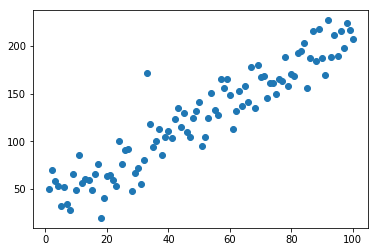

In [1]:
import numpy as np
import math

# create the data
x = np.arange(1,100+1)
e = np.random.normal(0,17, 100) #create random noise
slope = 1.75
intercept = 40
y = intercept + x * slope + e

import matplotlib.pyplot as pp
%matplotlib inline
pp.plot(x, y, 'o')

*Also see statsmodels.regression.linear_model.OLS for another method of OLS in Python*

# Creating the Model From Scratch

### Defineing the Slope
$$\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}
{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

beta1: 1.7780515949
xbar:  50.5
ybar:  124.957357552


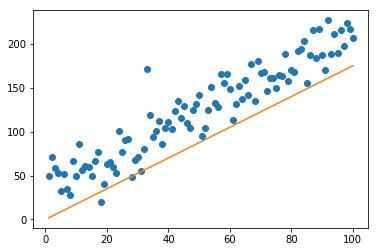

In [2]:
#x = np.arange(1,100+1)
#y = np.arange(1,200,2)

#calculate the slope
xbar = np.mean(x)
ybar = np.mean(y)
beta1 = sum((x - xbar) * (y - ybar)) / sum(((x - xbar)**2))

#print results
print('beta1:', beta1)
print('xbar: ', xbar)
print('ybar: ', ybar)

#plot the slope
pp.plot(x,y, 'o')
pp.plot(x,x*slope)

The slope is going the right direction, but it consistently under-estimates the acutal values because we still need to adjust it vertically to get a better estimate. We will do this using the intercept.

### Defining the Intercept
$$\hat{\beta}_0 = \bar{y} - \hat{\beta_1} \bar{x}$$

Estimate:  35.1657520094
Actual:  40


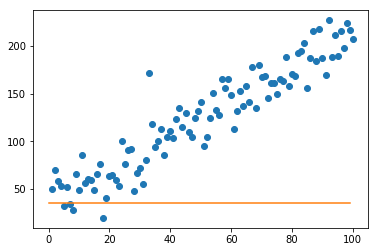

In [3]:
#calculate intercept
beta0 = ybar - beta1 * xbar

#print results
print('Estimate: ', beta0)
print('Actual: ', intercept)

#plot the intercept
pp.plot(x,y, 'o')
pp.plot([beta0] * len(x))

### Final Estimates
$$\hat{y} = \beta_0 + \beta_1 x$$

The final estimates are essentially the result of adding together the two orange lines above: slope + intercept.

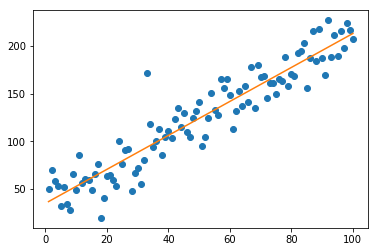

In [4]:
#calculate the fitted values
yhat = beta0 + beta1 * x

#plot the fitted values
pp.plot(x,y, 'o')
pp.plot(x,yhat)

### Calculate RSS
(residual sum of squares)
$$\sum_{i=1}^{n} (\hat{y_i} - y_i)^2$$

In [5]:
#calculate the residual sum of squares
rss = sum((yhat - y)**2)

print('RSS: ', int(round(rss)))

RSS:  34133


## Evaluating the Model
### Standard Error of Mean 

$$SE(\hat{\mu}) = \frac{\sigma^2}{n}$$

In [6]:
#calculate standard error of the mean
sigma = np.std(y) #equivalent to np.std(yhat)
n = len(y)
SEmu = sigma**2 / n
SEmu

29.756245891234265

### Standard Error of Intercept

Let
$$\sigma^2 = Residual Standard Error = RSE = \sqrt{RSS / (n - 2)}$$

Then, the standard error of the intercept equals
$$SE(\hat{\beta_0}) = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}]$$

In [20]:
#calculate standard error of the intercept
sigma = math.sqrt(np.std(yhat - y)/(n-2))
SEbeta0 = sigma**2 * (1/n + xbar**2 / sum( (x - xbar)**2 ))

SEbeta0


0.0076551405466039517

### Standard Error of Slope

Let
$$\sigma^2 = RSS = \sum_{i=1}^{n} (\hat{y_i} - y_i)^2$$

Then, the standard error of the slope equals
$$SE(\hat{\beta_1}) = \frac{\sigma^2} {\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

# Efficient Modeling Using sklearn

Actuals:   40    1.75
Estimates: 35    1.78


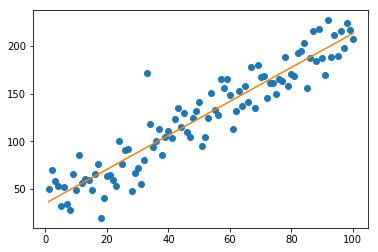

In [8]:
#sklearn linear_model is faster, but doesn't provide good summary output
from sklearn import linear_model

#create a linear regression object
lm = linear_model.LinearRegression()

#create the model
fit = lm.fit(x[:, np.newaxis], y) #you have to add a new axis because lm.fit requires a 2d x argument

#create estimates
yhat = fit.predict(x[:, np.newaxis])


#plot the real and estimated values
pp.plot(x,y, 'o')
pp.plot(x, yhat)

#print some summary stats
print('Actuals:  ', intercept, '  ', slope)
print('Estimates:', int(round(fit.intercept_)), '  ', round(fit.coef_[0],2))

### Calculate RSS

In [9]:
sum((yhat - y)**2)

34133.181629609804